In [82]:
import pandas as pd
from tqdm import tqdm

In [83]:
df = pd.read_csv('logs/stop_metrics_MCTS_200ITER_3600RO_1REWARD_EXPLOIT.csv')
df = df.rename({'event_no':'state_time_1', 'state_time': 'event_no_1'}, axis=1)
df = df.rename({'event_no_1':'event_no', 'state_time_1': 'state_time'}, axis=1)

In [84]:
df['state_time'] = pd.to_datetime(df['state_time'])

Text(0.5, 1.0, 'Passengers left behind over events')

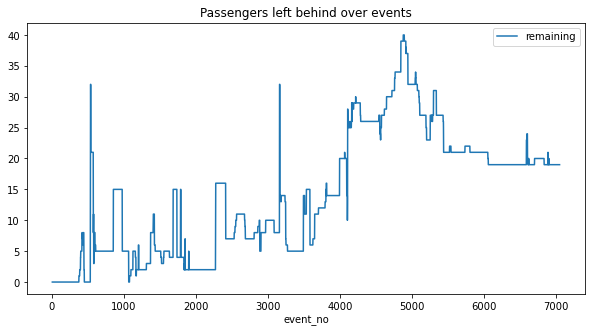

In [113]:
ax = df.groupby('event_no').sum().plot(kind='line', y='remaining', figsize=(10, 5))
ax.set_title('Passengers left behind over events')
# df.groupby('event_no').sum().reset_index().plot(kind='scatter', x='event_no', y='remaining')

In [66]:
# tdf = df.groupby(['event_no', 'state_time', 'stop_id']).agg({'remaining':'sum', 'got_on_bus':'sum', 'total_ons':'sum', 'total_walkaway':'sum'})
# df.query("event_no == 7030").groupby('stop_id').max()
arr = []
for k, v in tqdm(df.groupby('event_no')):
    arr.append(v.groupby('stop_id').max())
tdf = pd.concat(arr)

100%|██████████| 7044/7044 [03:39<00:00, 32.10it/s]


<AxesSubplot:xlabel='event_no'>

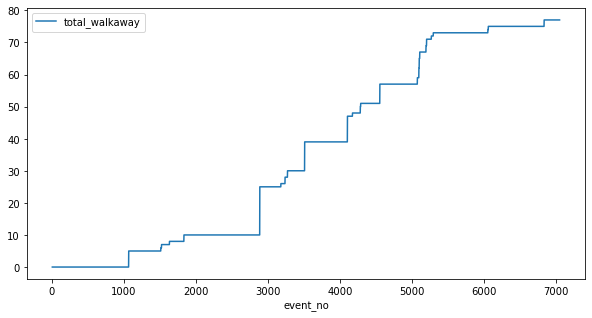

In [100]:
# tdf.groupby("event_no").sum().plot(kind='line', y='total_walkaway')
df.groupby('event_no').sum().plot(kind='line', y='total_walkaway', figsize=(10, 5))

# Bus Logs

In [106]:
bus_df = pd.read_csv('logs/bus_metrics_MCTS_200ITER_3600RO_1REWARD_EXPLOIT.csv')

# df = df.rename({'event_no':'state_time_1', 'state_time': 'event_no_1'}, axis=1)
# df = df.rename({'event_no_1':'event_no', 'state_time_1': 'state_time'}, axis=1)
bus_df['state_time'] = pd.to_datetime(df['state_time'])
# df.drop('na', axis=1, inplace=True)
# df.groupby('state_time').agg({'total_passengers_served':'sum'}).plot(kind='line', y='total_passengers_served')
bus_df.head()

,event_no,state_time,bus_id,status,type,capacity,load,current_block,current_trip,current_stop,time_at_last_stop,total_passengers_served,deadkms,servicekms
0,1,2022-03-05 04:48:57.500,2019,2,BusType.REGULAR,10.0,0.0,1800,259653,MCC5_1,None,0.0,0.0,0.0
1,1,2022-03-05 04:49:22.800,736,2,BusType.REGULAR,10.0,0.0,5000,262511,MCC5_1,None,0.0,0.0,0.0
2,1,2022-03-05 04:49:22.800,706,2,BusType.REGULAR,10.0,0.0,2200,260221,MCC5_1,None,0.0,0.0,0.0
3,1,2022-03-05 04:49:39.500,1812,2,BusType.REGULAR,10.0,0.0,2202,260160,MCC5_1,None,0.0,0.0,0.0
4,1,2022-03-05 04:49:39.500,1815,2,BusType.REGULAR,10.0,0.0,7601,264450,MCC5_1,None,0.0,0.0,0.0


<AxesSubplot:xlabel='event_no'>

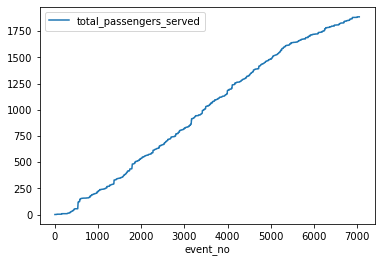

In [107]:
bus_df.groupby(['event_no']).agg({'total_passengers_served':'sum'}).plot(kind='line', y='total_passengers_served')

<AxesSubplot:xlabel='event_no'>

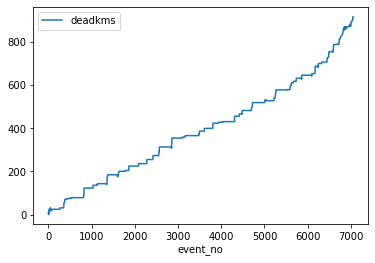

In [110]:
bus_df.groupby(['event_no']).agg({'deadkms':'sum'}).plot(kind='line', y='deadkms')

In [84]:
import pandas as pd
import numpy as np
# COmparing baseline with percentile_20
BL_df = pd.read_csv('logs/bus_metrics_BL.csv')
BL_df['state_time'] = pd.to_datetime(BL_df['state_time'])

p20_df = pd.read_csv('logs/bus_metrics_percentile_20.csv')
p20_df['state_time'] = pd.to_datetime(p20_df['state_time'])

BL_df['current_trip'].replace('None', np.nan, inplace=True)
p20_df['current_trip'].replace('None', np.nan, inplace=True)
BL_df = BL_df.dropna(subset=['current_trip'])
p20_df = p20_df.dropna(subset=['current_trip'])

BL_df['current_trip'] = BL_df['current_trip'].astype('int')
p20_df['current_trip'] = p20_df['current_trip'].astype('int')

BL_df = BL_df.dropna(subset=['current_trip'])
p20_df = p20_df.dropna(subset=['current_trip'])

/tmp/ipykernel_105606/3360886108.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  BL_df = pd.read_csv('logs/bus_metrics_BL.csv')
/tmp/ipykernel_105606/3360886108.py:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  p20_df = pd.read_csv('logs/bus_metrics_percentile_20.csv')


In [92]:
list_1 = BL_df.current_trip.unique().tolist()
list_2 = p20_df.current_trip.unique().tolist()
len(list_1), len(list_2)

(235, 236)

<AxesSubplot:xlabel='event_no'>

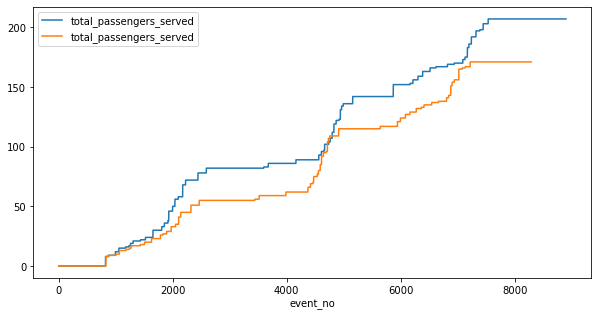

In [94]:
ax = BL_df.query("bus_id == 1763").groupby(['event_no']).agg({'total_passengers_served':'sum'}).plot(kind='line', y='total_passengers_served', figsize=(10, 5))
p20_df.query("bus_id == 1763").groupby(['event_no']).agg({'total_passengers_served':'sum'}).plot(kind='line', y='total_passengers_served', ax=ax)

In [90]:
BL_df.query("bus_id == 42").groupby('state_time').max().query("load > 0").current_trip.unique()

array([233063, 229901, 233357, 233372, 232372, 232464, 232734])

In [91]:
p20_df.query("bus_id == 42").groupby('state_time').max().query("load > 0").current_trip.unique()

array([232726, 230436, 230188, 232779, 230273, 230849, 233361])

In [95]:
BL_df.query("event_no == 8896")

,event_no,state_time,bus_id,status,type,capacity,load,current_block,current_trip,current_stop,time_at_last_stop,total_passengers_served,deadkms,servicekms
524805,8896,2021-03-05 12:55:35.100,120,1,BusType.REGULAR,10.0,0.0,5505,232466,MCC4_15,2021-03-05 11:43:00,183.0,0.000000,77.230063
524806,8896,2021-03-05 12:55:35.100,124,1,BusType.REGULAR,10.0,0.0,5503,232464,MCC4_15,2021-03-05 11:03:00,202.0,0.000000,77.230063
524807,8896,2021-03-05 12:55:35.100,125,1,BusType.REGULAR,10.0,0.0,900,233361,DOMFREEN,2021-03-05 12:01:20.100000,476.0,0.000000,132.171467
524808,8896,2021-03-05 12:55:35.100,137,1,BusType.REGULAR,10.0,0.0,5600,232823,MCC4_16,2021-03-05 11:43:00,233.0,0.000000,108.577699
524809,8896,2021-03-05 12:55:35.100,140,1,BusType.REGULAR,10.0,0.0,5602,232734,GXIRIVEF,2021-03-05 11:50:00,217.0,0.000000,77.333429
524810,8896,2021-03-05 12:55:35.100,1761,1,BusType.REGULAR,10.0,0.0,5601,232732,GXIRIVEF,2021-03-05 11:06:00,323.0,0.000000,76.917670
524811,8896,2021-03-05 12:55:35.100,1763,1,BusType.REGULAR,10.0,0.0,5605,232733,GXIRIVEF,2021-03-05 11:26:00,207.0,0.000000,76.917670
524812,8896,2021-03-05 12:55:35.100,1801,1,BusType.REGULAR,10.0,0.0,5203,232026,EZECONWN,2021-03-05 10:02:00,46.0,0.000000,16.633755
524813,8896,2021-03-05 12:55:35.100,1802,1,BusType.REGULAR,10.0,0.0,7600,233181,GXIMADLB,2021-03-05 12:00:00,267.0,0.000000,81.450948
524814,8896,2021-03-05 12:55:35.100,1803,1,BusType.REGULAR,10.0,0.0,5209,232068,NOLWELNN,2021-03-05 11:44:00,170.0,0.000000,54.161132


In [96]:
p20_df.query("event_no == 8286")

,event_no,state_time,bus_id,status,type,capacity,load,current_block,current_trip,current_stop,time_at_last_stop,total_passengers_served,deadkms,servicekms
488815,8286,2021-03-05 12:23:31.200,120,1,BusType.REGULAR,10.0,0.0,5505,232466,MCC4_15,2021-03-05 11:43:00,182.0,0.000000,77.230063
488816,8286,2021-03-05 12:23:31.200,124,1,BusType.REGULAR,10.0,0.0,5503,232464,MCC4_15,2021-03-05 11:03:00,201.0,0.000000,77.230063
488817,8286,2021-03-05 12:23:31.200,125,1,BusType.REGULAR,10.0,0.0,900,233361,DOMFREEN,2021-03-05 12:01:20.100000,476.0,0.000000,132.171467
488818,8286,2021-03-05 12:23:31.200,137,1,BusType.REGULAR,10.0,0.0,5600,232823,MCC4_16,2021-03-05 11:43:00,233.0,0.000000,108.577699
488819,8286,2021-03-05 12:23:31.200,140,1,BusType.REGULAR,10.0,0.0,5602,232734,GXIRIVEF,2021-03-05 11:50:00,207.0,0.000000,77.333429
488820,8286,2021-03-05 12:23:31.200,1761,1,BusType.REGULAR,10.0,0.0,5601,232732,GXIRIVEF,2021-03-05 11:06:00,323.0,0.000000,76.917670
488821,8286,2021-03-05 12:23:31.200,1763,1,BusType.REGULAR,10.0,0.0,5605,232733,GXIRIVEF,2021-03-05 11:26:00,171.0,0.000000,76.917670
488822,8286,2021-03-05 12:23:31.200,1801,1,BusType.REGULAR,10.0,0.0,5203,232026,EZECONWN,2021-03-05 10:02:00,46.0,0.000000,16.633755
488823,8286,2021-03-05 12:23:31.200,1802,1,BusType.REGULAR,10.0,0.0,7600,233181,GXIMADLB,2021-03-05 12:00:00,267.0,0.000000,81.450948
488824,8286,2021-03-05 12:23:31.200,1803,1,BusType.REGULAR,10.0,0.0,5209,232068,NOLWELNN,2021-03-05 11:44:00,155.0,0.000000,54.161132
